In [1]:
# from torchsr.datasets import Div2K
# from torchsr.models import ninasr_b0
from utils.training_utils import BabySINE, ImageDataset, pixel_coordinates_normalized, plot_image, list_png_files, load_image
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
import torch
import os
import matplotlib.pyplot as plt

# Autoreload
%reload_ext autoreload
%autoreload 2

# Div2K dataset
# dataset = Div2K(root="./data", scale=2, download=False)

In [2]:
# List all PNG files in the data folder
data_folder = "data"
image_files = list_png_files(data_folder)
print(f"Available PNG files: {image_files}")

Available PNG files: ['0010.png', '0028.png', '0002.png']


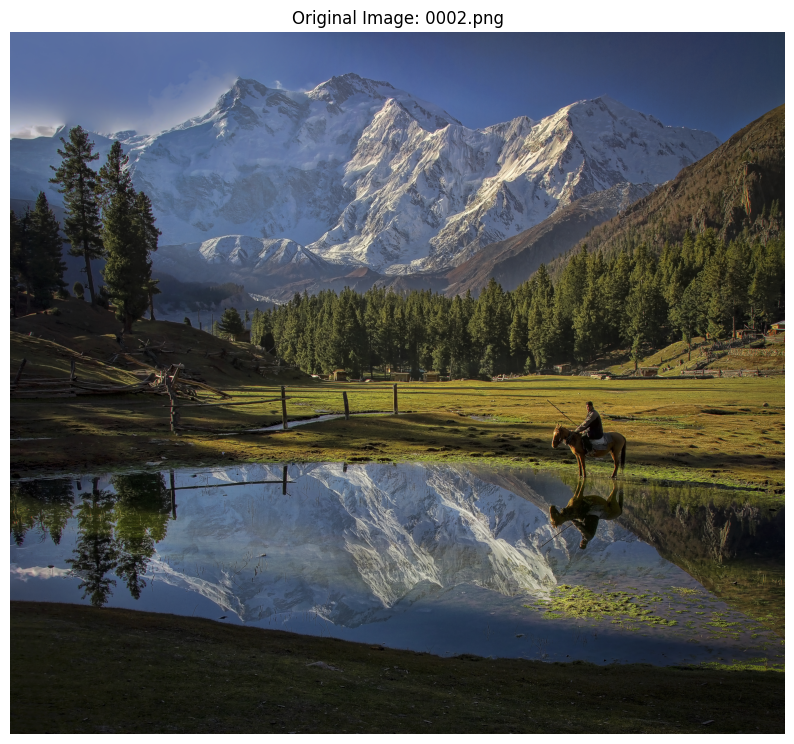

Image dimensions: 1848x2040, 3 channels


In [3]:
img_file_path = image_files[-1]
img_np_original, height_target, width_target, channels = load_image(data_folder, img_file_path)

The original image has shape: (1848, 2040, 3)
The downsampled image has shape: (115, 127, 3)


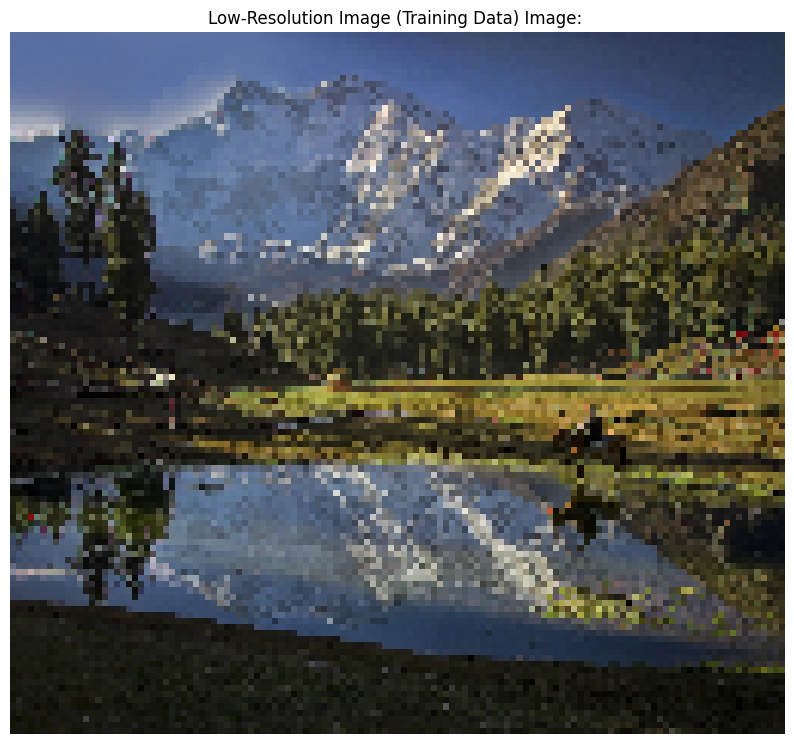

Image dimensions: 115x127, 3 channels


In [4]:
# Downsample the image and generate coordinates and pixel values
downsize_factor = 16 # Now we can use non-integer downsize factors
(
    low_res_coords, 
    low_res_pixel_values, 
    high_res_coords, 
    high_res_pixel_values, 
    low_res_shape, 
    high_res_shape
) = pixel_coordinates_normalized(img_np_original, downsize_factor)

# Reshape the low-resolution pixel values to the image shape
low_res_image = low_res_pixel_values.reshape(low_res_shape[0], low_res_shape[1], 3)

# Plot the low-resolution image
plot_image(low_res_image, "Low-Resolution Image (Training Data)")

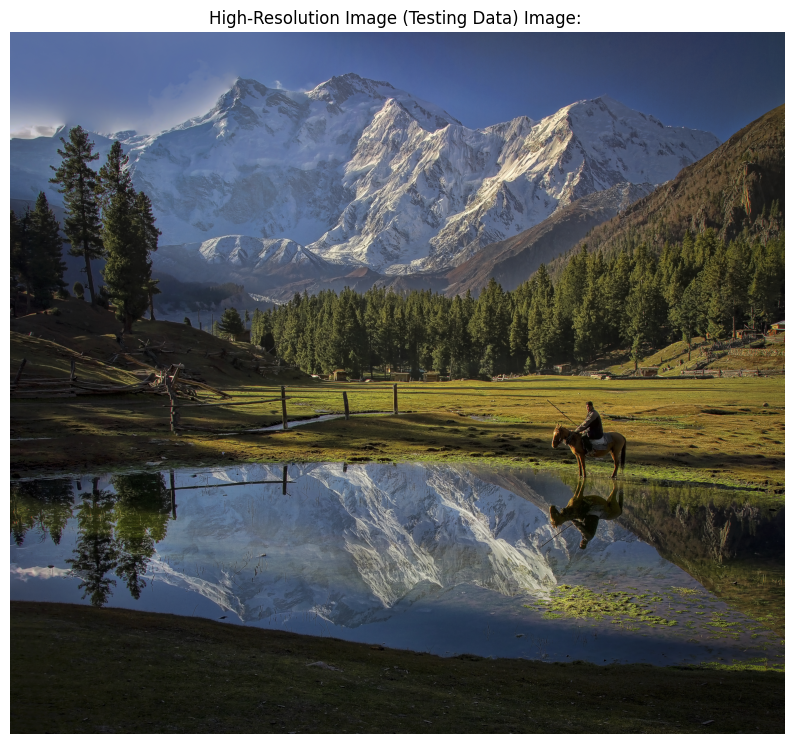

Image dimensions: 1848x2040, 3 channels


In [5]:
# Plot the original high res image

high_res_image = high_res_pixel_values.reshape(high_res_shape[0], high_res_shape[1], 3)
plot_image(high_res_image, "High-Resolution Image (Testing Data)")

In [6]:
# Create dataset and dataloader
dataset = ImageDataset(low_res_coords, low_res_pixel_values)
dataloader = DataLoader(dataset, batch_size=4096, shuffle=True)

In [7]:
# Initialize the model
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model = BabySINE(sigma=10.0, omega_0=15).to(device)

In [8]:
# # Define the sigma and omega_0 combinations to test (only 3 combinations)
# test_combinations = [
#     (1.0, 10),  # (sigma, omega_0)
#     (10.0, 20),
#     (5.0, 15),
#     (2.0, 12),
#     (8.0, 18)
# ]
# num_epochs = 50
# learning_rate = 1e-4

# # Dictionary to store losses for each (sigma, omega_0) combination
# results = {}

# # Perform cross-validation with tqdm
# with tqdm(total=len(test_combinations), desc="Cross-Validation Progress") as pbar:
#     for sigma, omega_0 in test_combinations:
#         print(f"Training model with sigma = {sigma}, omega_0 = {omega_0}")
        
#         # Initialize the model
#         model = BabySINE(sigma=sigma, omega_0=omega_0).to(device)
        
#         # Train the model
#         losses = model.train_model(
#             dataloader,
#             num_epochs=num_epochs,
#             lr=learning_rate,
#             sigma=sigma,
#         )
        
#         # Store the losses for this (sigma, omega_0) combination
#         results[(sigma, omega_0)] = losses

#         # Plot the loss curve for this combination
#         plt.figure(figsize=(10, 4))
#         plt.plot(losses)
#         plt.title(f"Training Loss for Sigma = {sigma}, Omega_0 = {omega_0}")
#         plt.xlabel("Epoch")
#         plt.ylabel("MSE Loss")
#         plt.grid(True)
#         plt.show()

#         # Update the progress bar
#         pbar.update(1)

# # Compare the loss curves for all (sigma, omega_0) combinations
# plt.figure(figsize=(12, 6))
# for (sigma, omega_0), losses in results.items():
#     plt.plot(losses, label=f"Sigma = {sigma}, Omega_0 = {omega_0}")
# plt.title("Training Loss for Different Sigma and Omega_0 Values")
# plt.xlabel("Epoch")
# plt.ylabel("MSE Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

In [9]:
# Train the model
losses = model.train_model(
    dataloader,
    num_epochs=200,
    lr=1e-4,
    sigma=10.0,
)

Using device: mps


  2%|▏         | 4/200 [00:00<00:15, 12.92it/s]

Learning rate: 0.0001
Epoch 0, Loss: 0.077730
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


  4%|▎         | 7/200 [00:00<00:13, 14.28it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


  6%|▋         | 13/200 [00:00<00:09, 18.76it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Epoch 10, Loss: 0.065963
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


  8%|▊         | 16/200 [00:00<00:09, 19.85it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


 11%|█         | 22/200 [00:01<00:08, 20.64it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Epoch 20, Loss: 0.033070
Learning rate: 0.0001
Learning rate: 0.0001


 12%|█▎        | 25/200 [00:01<00:08, 21.82it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


 16%|█▌        | 31/200 [00:01<00:07, 21.31it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Epoch 30, Loss: 0.010226
Learning rate: 0.0001


 17%|█▋        | 34/200 [00:01<00:07, 21.55it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


 20%|██        | 40/200 [00:02<00:08, 19.95it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Epoch 40, Loss: 0.006276


 23%|██▎       | 46/200 [00:02<00:07, 21.20it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001


 24%|██▍       | 49/200 [00:02<00:07, 19.48it/s]

Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 0.0001
Learning rate: 5e-05


 28%|██▊       | 55/200 [00:02<00:06, 20.79it/s]

Learning rate: 5e-05
Epoch 50, Loss: 0.004412
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 29%|██▉       | 58/200 [00:03<00:07, 18.54it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 32%|███▏      | 64/200 [00:03<00:06, 20.26it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Epoch 60, Loss: 0.003781
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 34%|███▎      | 67/200 [00:03<00:06, 20.57it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 36%|███▋      | 73/200 [00:03<00:06, 19.85it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Epoch 70, Loss: 0.003255
Learning rate: 5e-05
Learning rate: 5e-05


 38%|███▊      | 76/200 [00:03<00:06, 20.01it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 41%|████      | 82/200 [00:04<00:05, 19.74it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Epoch 80, Loss: 0.002801
Learning rate: 5e-05


 42%|████▎     | 85/200 [00:04<00:05, 20.78it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 46%|████▌     | 91/200 [00:04<00:05, 20.61it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Epoch 90, Loss: 0.002409
Learning rate: 5e-05


 47%|████▋     | 94/200 [00:04<00:04, 21.48it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05


 50%|█████     | 100/200 [00:05<00:04, 20.92it/s]

Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Epoch 100, Loss: 0.002087


 53%|█████▎    | 106/200 [00:05<00:04, 22.47it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 55%|█████▍    | 109/200 [00:05<00:04, 20.50it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 57%|█████▊    | 115/200 [00:05<00:03, 22.15it/s]

Learning rate: 2.5e-05
Epoch 110, Loss: 0.001945
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 59%|█████▉    | 118/200 [00:05<00:03, 22.25it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 62%|██████▏   | 124/200 [00:06<00:03, 20.42it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Epoch 120, Loss: 0.001812
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 64%|██████▎   | 127/200 [00:06<00:03, 20.87it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 66%|██████▋   | 133/200 [00:06<00:03, 20.43it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Epoch 130, Loss: 0.001673
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 68%|██████▊   | 136/200 [00:06<00:03, 20.92it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 71%|███████   | 142/200 [00:07<00:02, 20.45it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Epoch 140, Loss: 0.001560
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 74%|███████▍  | 148/200 [00:07<00:02, 21.67it/s]

Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05
Learning rate: 2.5e-05


 76%|███████▌  | 151/200 [00:07<00:02, 20.36it/s]

Learning rate: 2.5e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Epoch 150, Loss: 0.001432
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 78%|███████▊  | 157/200 [00:07<00:02, 21.35it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 82%|████████▏ | 163/200 [00:08<00:01, 20.55it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Epoch 160, Loss: 0.001406
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 83%|████████▎ | 166/200 [00:08<00:01, 21.40it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 86%|████████▌ | 172/200 [00:08<00:01, 21.04it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Epoch 170, Loss: 0.001340
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 89%|████████▉ | 178/200 [00:08<00:01, 21.81it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 90%|█████████ | 181/200 [00:09<00:00, 19.43it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Epoch 180, Loss: 0.001285
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 94%|█████████▎| 187/200 [00:09<00:00, 21.03it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05


 95%|█████████▌| 190/200 [00:09<00:00, 19.47it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Epoch 190, Loss: 0.001246
Learning rate: 1.25e-05


 98%|█████████▊| 196/200 [00:09<00:00, 21.14it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 1.25e-05


100%|██████████| 200/200 [00:09<00:00, 20.11it/s]

Learning rate: 1.25e-05
Learning rate: 1.25e-05
Learning rate: 6.25e-06


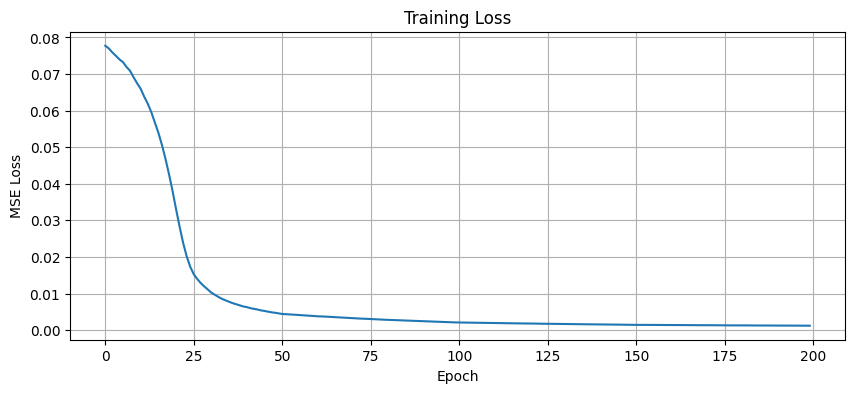

In [10]:
# Plot the loss curve
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

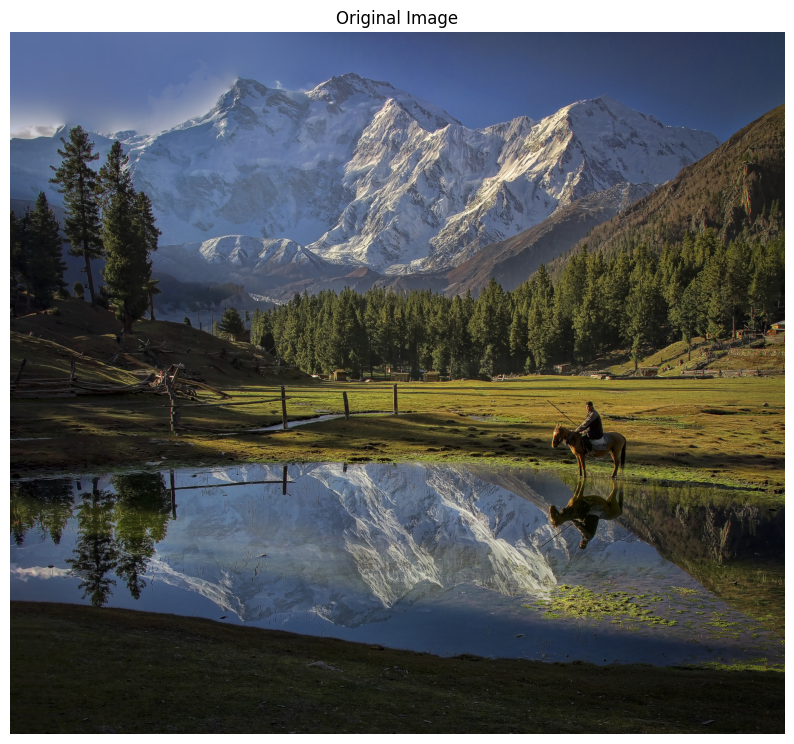

Image shape: (1848, 2040, 3)


In [11]:
# Plot the original Image
plt.figure(figsize=(10, 10))
plt.imshow(img_np_original)
plt.title("Original Image")
plt.axis("off")
plt.show()
print(f"Image shape: {img_np_original.shape}")

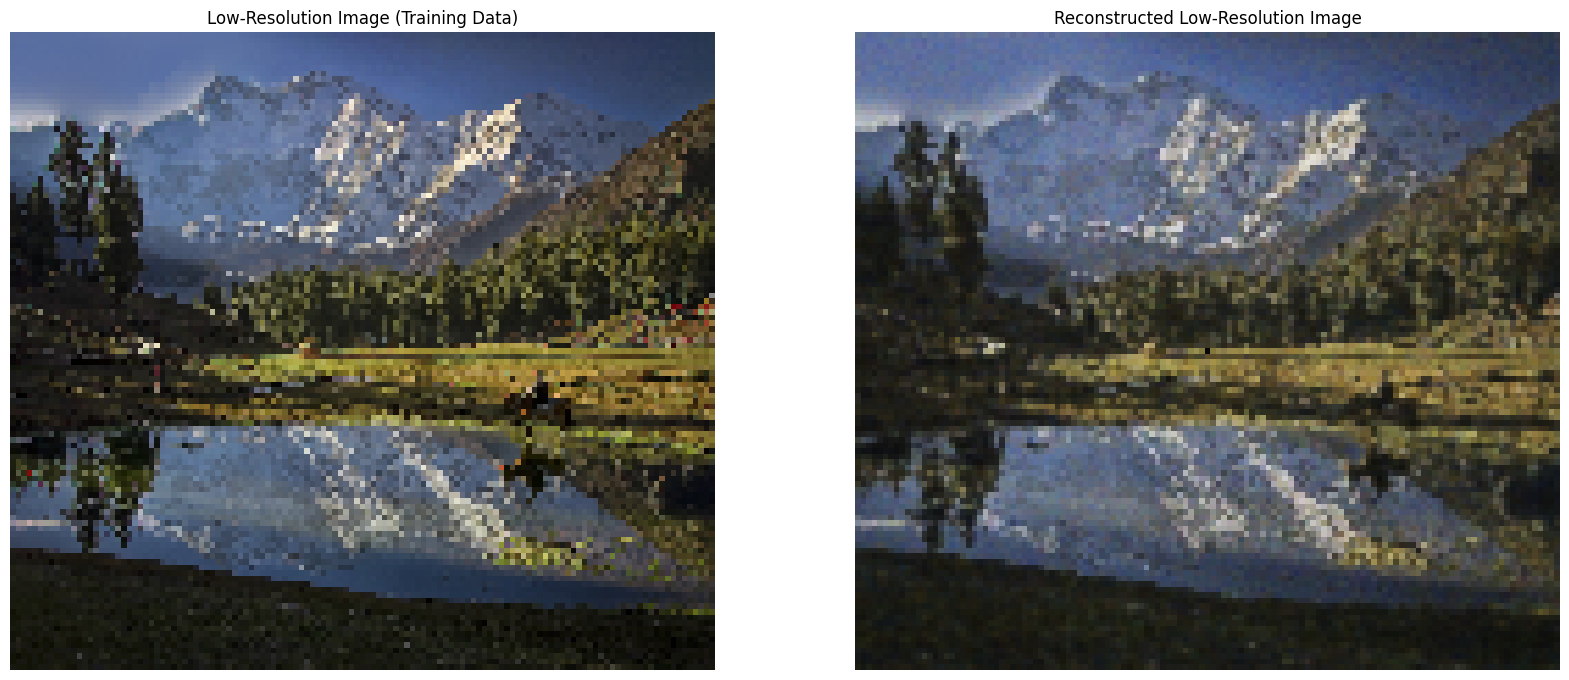

In [12]:
# Reconstruct the low-resolution image (learned during training)
target_coords_tensor_lr = torch.from_numpy(low_res_coords).float().to(device)
with torch.no_grad():
    pred_pixels_lr = model(target_coords_tensor_lr).cpu().numpy()

# Reshape and denormalize the predicted pixels for the low-resolution image
reconstructed_img_lr_normalized = pred_pixels_lr.reshape(low_res_shape[0], low_res_shape[1], 3)
# reconstructed_img_lr_denormalized = (reconstructed_img_lr_normalized * 255).astype(np.uint8)
# reconstructed_img_lr_denormalized = np.clip(reconstructed_img_lr_denormalized, 0, 255)

# Plot the reconstructed low-resolution image side by side with the training low res image
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.imshow(low_res_image)
plt.title("Low-Resolution Image (Training Data)")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img_lr_normalized)
plt.title("Reconstructed Low-Resolution Image")
plt.axis("off")
plt.show()

In [13]:
# # Reconstruct the high-resolution image (using high-resolution coordinates)
# target_coords_tensor_hr = torch.from_numpy(high_res_coords).float().to(device)
# with torch.no_grad():
#     pred_pixels_hr = model(target_coords_tensor_hr).cpu().numpy()

# # Reshape and denormalize the predicted pixels for the high-resolution image
# reconstructed_img_hr_normalized = pred_pixels_hr.reshape(high_res_shape[0], high_res_shape[1], 3)
# reconstructed_img_hr_denormalized = (reconstructed_img_hr_normalized * 255).astype(np.uint8)
# reconstructed_img_hr_denormalized = np.clip(reconstructed_img_hr_denormalized, 0, 255)

# # Plot the reconstructed high-resolution image
# plot_image(reconstructed_img_hr_denormalized, "Reconstructed High-Resolution")

In [14]:
# # Original high res picture side by side with reconstructed_img_hr_denormalized
# fig, ax = plt.subplots(1, 2, figsize=(20, 13))
# ax[0].imshow(high_res_image)
# ax[0].set_title("Original High-Resolution Image")
# ax[0].axis("off")
# ax[1].imshow(reconstructed_img_hr_denormalized)
# ax[1].set_title("Reconstructed High-Resolution Image")
# ax[1].axis("off")
# plt.show()